In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data = pd.read_csv('/content/drive/MyDrive/creditcard.csv')

In [6]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
%time data.isnull().any()

CPU times: user 16.1 ms, sys: 1.72 ms, total: 17.8 ms
Wall time: 19.3 ms


Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [8]:
data.reset_index(drop=True, inplace=True)
labels = data.pop('Class')

In [9]:
data -= data.mean()
data /= data.std()

In [10]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05
mean,-1.137547e-15,-2.369347e-15,-9.299088e-17,6.265771e-15,1.966167e-16,1.757901e-15,-2.227124e-16,1.663279e-15,2.504277e-16,1.113356e-15,3.169574e-16,2.633087e-15,2.009085e-15,-9.906970e-16,-1.164815e-15,1.512182e-15,-8.075037e-19,6.119884e-16,1.391775e-15,-9.474671e-17,6.157864e-16,1.850826e-17,-2.630385e-15,-7.445328e-16,7.621335e-17,-1.055018e-15,-1.504105e-16,2.448796e-17,-3.725646e-17,2.278134e-13
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.996580e+00,-2.879850e+01,-4.403521e+01,-3.187168e+01,-4.013912e+00,-8.240795e+01,-1.963602e+01,-3.520933e+01,-6.130242e+01,-1.222799e+01,-2.258187e+01,-4.700120e+00,-1.869865e+01,-5.819382e+00,-2.004425e+01,-4.915182e+00,-1.612532e+01,-2.962640e+01,-1.133264e+01,-8.861386e+00,-7.069134e+01,-4.741898e+01,-1.506562e+01,-7.175434e+01,-4.683630e+00,-1.975030e+01,-5.401088e+00,-5.590650e+01,-4.674604e+01,-3.532288e-01
25%,-8.552105e-01,-4.698909e-01,-3.624701e-01,-5.872131e-01,-5.993777e-01,-5.010677e-01,-5.766811e-01,-4.478852e-01,-1.746801e-01,-5.853621e-01,-4.917352e-01,-7.470211e-01,-4.058956e-01,-6.516187e-01,-4.439557e-01,-6.368121e-01,-5.341344e-01,-5.695599e-01,-5.951610e-01,-5.605359e-01,-2.746329e-01,-3.109428e-01,-7.473463e-01,-2.591780e-01,-5.854666e-01,-6.083990e-01,-6.780705e-01,-1.755050e-01,-1.604437e-01,-3.308395e-01
50%,-2.131450e-01,9.245335e-03,3.965677e-02,1.186122e-01,-1.401721e-02,-3.936675e-02,-2.058043e-01,3.241718e-02,1.871979e-02,-4.681161e-02,-8.533536e-02,-3.209262e-02,1.401445e-01,-1.363248e-02,5.278693e-02,5.251907e-02,7.579241e-02,-7.732590e-02,-4.338363e-03,4.588006e-03,-8.104691e-02,-4.009422e-02,9.345360e-03,-1.792417e-02,6.765666e-02,3.183234e-02,-1.081215e-01,3.325168e-03,3.406362e-02,-2.652710e-01
75%,9.372158e-01,6.716927e-01,4.867194e-01,6.774557e-01,5.250073e-01,4.433457e-01,2.991620e-01,4.611099e-01,2.740780e-01,5.435296e-01,4.168834e-01,7.245851e-01,6.187322e-01,6.656507e-01,5.144504e-01,7.088490e-01,5.971978e-01,4.705729e-01,5.974958e-01,5.637918e-01,1.725730e-01,2.537387e-01,7.283347e-01,2.364315e-01,7.257141e-01,6.727994e-01,4.996654e-01,2.255644e-01,2.371521e-01,-4.471699e-02
max,1.642055e+00,1.253349e+00,1.335773e+01,6.187982e+00,1.191872e+01,2.521409e+01,5.502005e+01,9.747807e+01,1.675150e+01,1.419492e+01,2.180754e+01,1.177502e+01,7.854665e+00,7.160723e+00,1.098145e+01,9.699100e+00,1.976040e+01,1.089500e+01,6.014331e+00,6.869402e+00,5.113455e+01,3.703465e+01,1.447302e+01,3.607661e+01,7.569671e+00,1.442529e+01,7.293962e+00,7.831926e+01,1.025432e+02,1.023621e+02


In [11]:
data_len = len(data)
train_data = data.iloc[:data_len*50//100]
val_data = data.iloc[data_len*50//100:data_len*70//100]
test_data = data.iloc[data_len*70//100:]
labels_len = len(labels)
train_labels = labels.iloc[:labels_len*50//100]
val_labels = labels.iloc[labels_len*50//100:labels_len*70//100]
test_labels = labels.iloc[labels_len*70//100:]

In [12]:
from tensorflow.keras import models
from tensorflow.keras import layers
import tensorflow as tf
network = models.Sequential()
network.add(layers.Dense(10,activation="tanh",input_shape=(len(train_data.columns),) ))
network.add(layers.Dense(8,activation="tanh",input_shape=(data.shape[1],) ))
network.add(layers.Dense(6,activation="tanh",input_shape=(data.shape[1],) ))
network.add(layers.Dense(1,activation="sigmoid"))
network.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

In [13]:
network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                310       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 459
Trainable params: 459
Non-trainable params: 0
_________________________________________________________________


In [14]:
with tf.device('/device:GPU:1'):
  %time MODEL = network.fit(train_data,train_labels,epochs=10,batch_size=256,validation_data=(val_data,val_labels))

Epoch 1/10
557/557 [==============================] - 2s 2ms/step - loss: 0.2740 - acc: 0.8869 - val_loss: 0.6862 - val_acc: 0.7485
Epoch 2/10
557/557 [==============================] - 1s 2ms/step - loss: 0.0053 - acc: 0.9991 - val_loss: 0.8392 - val_acc: 0.7556
Epoch 3/10
557/557 [==============================] - 1s 2ms/step - loss: 0.0034 - acc: 0.9991 - val_loss: 0.9544 - val_acc: 0.7414
Epoch 4/10
557/557 [==============================] - 1s 2ms/step - loss: 0.0030 - acc: 0.9994 - val_loss: 0.9725 - val_acc: 0.7449
Epoch 5/10
557/557 [==============================] - 1s 2ms/step - loss: 0.0030 - acc: 0.9994 - val_loss: 0.9385 - val_acc: 0.7490
Epoch 6/10
557/557 [==============================] - 1s 2ms/step - loss: 0.0028 - acc: 0.9994 - val_loss: 0.9227 - val_acc: 0.7494
Epoch 7/10
557/557 [==============================] - 1s 2ms/step - loss: 0.0026 - acc: 0.9994 - val_loss: 0.8067 - val_acc: 0.7646
Epoch 8/10
557/557 [==============================] - 1s 2ms/step - loss: 0.

In [15]:
test_loss , test_acc = network.evaluate(test_data,test_labels)

2671/2671 [==============================] - 2s 900us/step - loss: 1.7188 - acc: 0.5506


In [16]:
test_labels[test_labels == 1]

199896    1
201098    1
201601    1
203324    1
203328    1
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 108, dtype: int64

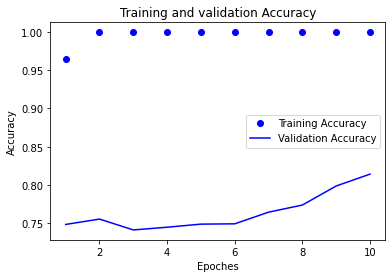

In [17]:
history_dict = MODEL.history
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epoches = np.arange(1,len(history_dict['acc'])+1)
plt.plot(epoches,acc_values,'bo',label="Training Accuracy")
plt.plot(epoches,val_acc_values,'b',label="Validation Accuracy")
plt.title('Training and validation Accuracy')
plt.xlabel("Epoches")
plt.ylabel("Accuracy")
plt.legend()

In [18]:
from tensorflow.keras import models
from tensorflow.keras import layers
import tensorflow as tf
network1 = models.Sequential()
network1.add(layers.Dense(30,activation="relu",input_shape=(len(train_data.columns),) ))
network1.add(layers.Dense(20,activation="relu" ))
network1.add(layers.Dense(10,activation="relu"))
network1.add(layers.Dense(1,activation="sigmoid"))
network1.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
with tf.device('/device:GPU:1'):
  %time MODEL1 = network1.fit(train_data,train_labels,epochs=10,batch_size=512,validation_data=(val_data,val_labels))

Epoch 1/10
279/279 [==============================] - 1s 3ms/step - loss: 0.2132 - acc: 0.9209 - val_loss: 0.0179 - val_acc: 0.9992
Epoch 2/10
279/279 [==============================] - 1s 2ms/step - loss: 0.0048 - acc: 0.9992 - val_loss: 0.0146 - val_acc: 0.9991
Epoch 3/10
279/279 [==============================] - 1s 2ms/step - loss: 0.0035 - acc: 0.9993 - val_loss: 0.0127 - val_acc: 0.9989
Epoch 4/10
279/279 [==============================] - 1s 2ms/step - loss: 0.0034 - acc: 0.9992 - val_loss: 0.0117 - val_acc: 0.9985
Epoch 5/10
279/279 [==============================] - 1s 2ms/step - loss: 0.0027 - acc: 0.9993 - val_loss: 0.0108 - val_acc: 0.9989
Epoch 6/10
279/279 [==============================] - 1s 2ms/step - loss: 0.0024 - acc: 0.9994 - val_loss: 0.0127 - val_acc: 0.9981
Epoch 7/10
279/279 [==============================] - 1s 2ms/step - loss: 0.0028 - acc: 0.9995 - val_loss: 0.0140 - val_acc: 0.9970
Epoch 8/10
279/279 [==============================] - 1s 2ms/step - loss: 0.

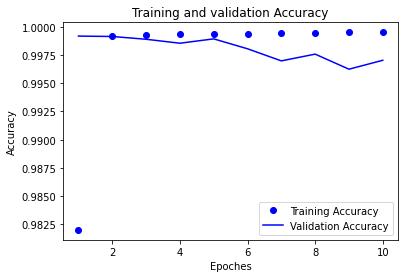

In [19]:
history_dict = MODEL1.history
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epoches = np.arange(1,len(history_dict['acc'])+1)
plt.plot(epoches,acc_values,'bo',label="Training Accuracy")
plt.plot(epoches,val_acc_values,'b',label="Validation Accuracy")
plt.title('Training and validation Accuracy')
plt.xlabel("Epoches")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [20]:
test_loss , test_acc = network1.evaluate(test_data,test_labels)

2671/2671 [==============================] - 2s 890us/step - loss: 0.0193 - acc: 0.9965


In [21]:
#prediction
prediction_test_data = test_data
predictions = network1.predict(prediction_test_data)
hit = np.argmax(predictions) == np.array(test_labels)
print(f"{len(hit)} out of {len(predictions)} ")

85443 out of 85443 


In [22]:
y_pred = (predictions > 0.5).astype('u8')

In [23]:
print(f"Accuracy is upto {test_acc*100}%")

Accuracy is upto 99.64771866798401%


In [24]:
tf.math.confusion_matrix(
    test_labels, y_pred, num_classes=None, weights=None, dtype=tf.dtypes.int32,
    name=None
)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[85054,   281],
       [   20,    88]], dtype=int32)>

In [26]:
p=np.argmax(predictions)